In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
import numpy as np
import pandas as pd

# Constantes
k = 7.56e-4  # T/A
radii_cm = [3.18, 4.2, 5.2]  # cm
radii_m = [r*1e-2 for r in radii_cm]  # m

# Datos experimentales
U = np.array([300, 280, 260, 240, 220, 200])  # V
IH_data = {
    "3.18": [2.53, 2.34, 2.21, 2.09, 1.89, 1.74],
    "4.2": [1.91, 1.82, 1.67, 1.57, 1.44, 1.34],
    "5.2": [1.54, 1.49, 1.41, 1.33, 1.23, 1.12]
}
ems=[]
# Guardar resultados
results = []

for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)  # datos de corriente
    B = k * I_H  # Tesla
    
    for u, b, i in zip(U, B, I_H):
        if np.isnan(i):  # seguridad por si hay datos faltantes
            continue
        e_m = (2 * u) / ((b**2) * (r_m**2))  # C/kg
        ems.append(e_m)
        results.append([u, r_cm, i, b, e_m])

# Pasamos a DataFrame para visualizar
df = pd.DataFrame(results, columns=["U [V]", "r [cm]", "I_H [A]", "B [T]", "e/m [C/kg]"])
print(df)


    U [V]  r [cm]  I_H [A]     B [T]    e/m [C/kg]
0     300    3.18     2.53  0.001913  1.621856e+11
1     280    3.18     2.34  0.001769  1.769532e+11
2     260    3.18     2.21  0.001671  1.842133e+11
3     240    3.18     2.09  0.001580  1.901301e+11
4     220    3.18     1.89  0.001429  2.131234e+11
5     200    3.18     1.74  0.001315  2.285934e+11
6     300    4.20     1.91  0.001444  1.631332e+11
7     280    4.20     1.82  0.001376  1.676884e+11
8     260    4.20     1.67  0.001263  1.849389e+11
9     240    4.20     1.57  0.001187  1.931522e+11
10    220    4.20     1.44  0.001089  2.104677e+11
11    200    4.20     1.34  0.001013  2.209572e+11
12    300    5.20     1.54  0.001164  1.637041e+11
13    280    5.20     1.49  0.001126  1.632169e+11
14    260    5.20     1.41  0.001066  1.692446e+11
15    240    5.20     1.33  0.001005  1.755851e+11
16    220    5.20     1.23  0.000930  1.881881e+11
17    200    5.20     1.12  0.000847  2.063354e+11


In [47]:
em3=np.array([162185631836.5509,176953224627.02536,184213292666.59186,190130081421.68512,213123449680.3629,228593387682.78027])
em4=np.array([163133195775.97412,167688422516.29504,184938882704.87302,193152245205.99814,210467731694.11145,220957233054.99777])
em5=np.array([163704090163.1186,163216932667.6555,169244607514.7487,175585107233.1288,188188107719.80408,206335363643.09738])

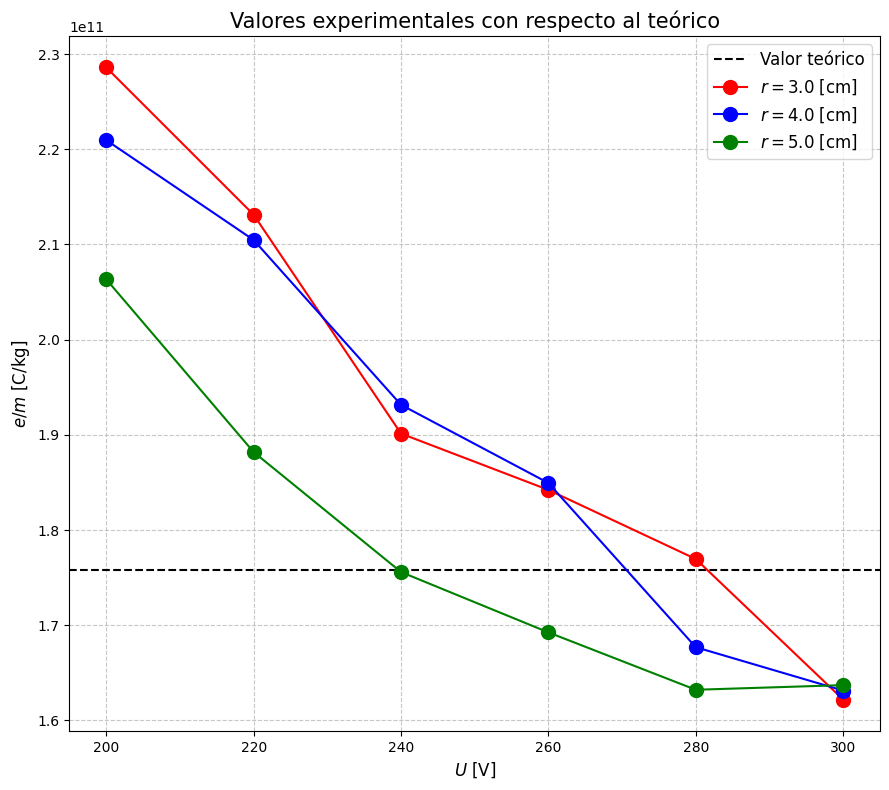

In [70]:
plt.figure(figsize=(9, 8))
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(1.758e11, color='black', linestyle='--', label="Valor teórico")
plt.plot(U,em3,"-o",color="red",label=r"$r=3.0$ [cm]",markersize=10)
plt.plot(U,em4,"-o",color="blue",label=r"$r=4.0$ [cm]",markersize=10)
plt.plot(U,em5,"-o",color="green",label=r"$r=5.0$ [cm]",markersize=10)
plt.legend(fontsize=12, loc='upper right')
plt.xlabel(r"$U$ [V]",fontsize=12)
plt.ylabel(r"$e/m$ [C/kg]",fontsize=12)
plt.title("Valores experimentales con respecto al teórico",fontsize=15)
plt.tight_layout()

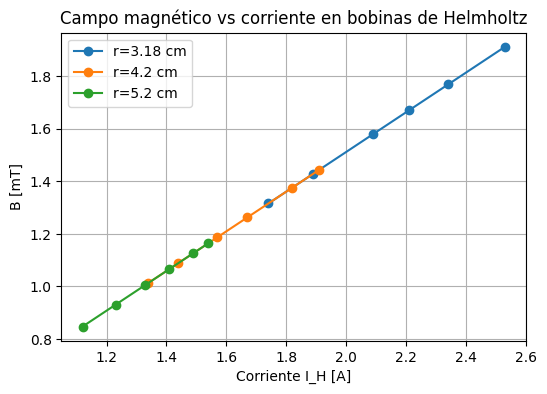

In [39]:
# --- Gráficos ---
# 1. B vs I_H
plt.figure(figsize=(6,4))
for r_cm in radii_cm:
    I_H = np.array(IH_data[str(r_cm)], dtype=float)  # datos de corriente
    plt.plot(I_H, k*I_H*1e3, 'o-', label=f"r={r_cm} cm") # mT
plt.xlabel("Corriente I_H [A]")
plt.ylabel("B [mT]")
plt.title("Campo magnético vs corriente en bobinas de Helmholtz")
plt.legend()
plt.grid()
plt.show()

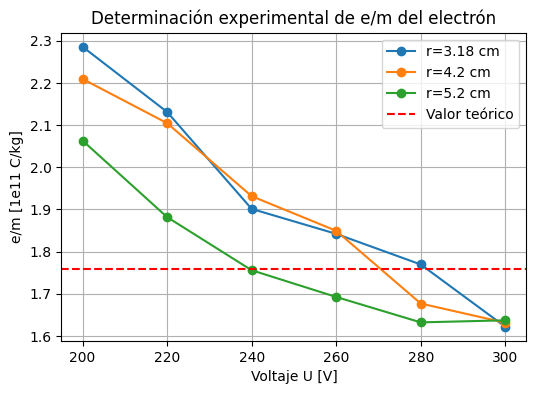

In [ ]:
# 2. e/m vs U
plt.figure(figsize=(6,4))
for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)  # datos de corriente
    B = k * I_H
    mask = ~np.isnan(I_H)
    e_m_vals = (2*U[mask]) / ( (B[mask]**2) * (r_m**2) )
    plt.plot(U[mask], e_m_vals/1e11, 'o-', label=f"r={r_cm} cm")
plt.axhline(1.758, color='r', linestyle='--', label="Valor teórico")
plt.xlabel("Voltaje U [V]")
plt.ylabel("e/m [1e11 C/kg]")
plt.title("Determinación experimental de e/m del electrón")
plt.legend()
plt.grid()
plt.show()

In [8]:
import numpy as np
import pandas as pd

# Constantes
k = 7.56e-4  # T/A
radii_cm = [3.18, 4.2, 5.2]  # cm
radii_m = [r*1e-2 for r in radii_cm]  # m

# Valor teórico e/m (C/kg)
e_m_teorico = 1.758820e11  

# Datos experimentales
U = np.array([300, 280, 260, 240, 220, 200])  # V
IH_data = {
    "3.18": [2.53, 2.34, 2.21, 2.09, 1.89, 1.74],
    "4.2": [1.91, 1.82, 1.67, 1.57, 1.44, 1.34],
    "5.2": [1.54, 1.49, 1.41, 1.33, 1.23, 1.12]
}

# Guardar resultados
results = []

for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)  # datos de corriente
    B = k * I_H  # Tesla
    
    for u, b, i in zip(U, B, I_H):
        if np.isnan(i):  # seguridad por si hay datos faltantes
            continue
        e_m_exp = (2 * u) / ((b**2) * (r_m**2))  # C/kg
        error_rel = abs(e_m_exp - e_m_teorico) / e_m_teorico * 100  # %
        results.append([u, r_cm, i, b, e_m_exp, error_rel])

# Pasamos a DataFrame para visualizar
df = pd.DataFrame(results, columns=["U [V]", "r [cm]", "I_H [A]", "B [T]", "e/m exp [C/kg]", "Error [%]"])
print(df)


    U [V]  r [cm]  I_H [A]     B [T]  e/m exp [C/kg]  Error [%]
0     300    3.18     2.53  0.001913    1.621856e+11   7.787248
1     280    3.18     2.34  0.001769    1.769532e+11   0.609059
2     260    3.18     2.21  0.001671    1.842133e+11   4.736865
3     240    3.18     2.09  0.001580    1.901301e+11   8.100932
4     220    3.18     1.89  0.001429    2.131234e+11  21.174111
5     200    3.18     1.74  0.001315    2.285934e+11  29.969745
6     300    4.20     1.91  0.001444    1.631332e+11   7.248499
7     280    4.20     1.82  0.001376    1.676884e+11   4.658565
8     260    4.20     1.67  0.001263    1.849389e+11   5.149409
9     240    4.20     1.57  0.001187    1.931522e+11   9.819223
10    220    4.20     1.44  0.001089    2.104677e+11  19.664168
11    200    4.20     1.34  0.001013    2.209572e+11  25.628110
12    300    5.20     1.54  0.001164    1.637041e+11   6.923909
13    280    5.20     1.49  0.001126    1.632169e+11   7.200889
14    260    5.20     1.41  0.001066    

In [9]:
import numpy as np
import pandas as pd

# Constantes
k = 7.56e-4  # T/A
radii_cm = [3.18, 4.2, 5.1]  # cm
radii_m = [r*1e-2 for r in radii_cm]  # m

# Valor teórico e/m (C/kg)
e_m_teorico = 1.758820e11  

# Datos experimentales
U = np.array([300, 280, 260, 240, 220, 200])  # V
IH_data = {
    "3.18": [2.53, 2.34, 2.21, 2.09, 1.89, 1.74],
    "4.2": [1.91, 1.82, 1.67, 1.57, 1.44, 1.34],
    "5.1": [1.54, 1.49, 1.41, 1.33, 1.23, 1.12]
}

# Guardar resultados
results = []

for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)  # datos de corriente
    B = k * I_H  # Tesla
    
    for u, b, i in zip(U, B, I_H):
        if np.isnan(i):
            continue
        e_m_exp = (2 * u) / ((b**2) * (r_m**2))  # C/kg
        results.append([r_cm, e_m_exp])

# DataFrame con todos los valores
df = pd.DataFrame(results, columns=["r [cm]", "e/m exp [C/kg]"])

# Promedios por radio
df_promedios = df.groupby("r [cm]").mean().reset_index()

# Error respecto al valor teórico
df_promedios["Error respecto teorico [%]"] = abs(df_promedios["e/m exp [C/kg]"] - e_m_teorico) / e_m_teorico * 100

print(df_promedios)


   r [cm]  e/m exp [C/kg]  Error respecto teorico [%]
0    3.18    1.925332e+11                    9.467244
1    4.20    1.900563e+11                    8.058974
2    5.10    1.847498e+11                    5.041906


In [10]:
promajustelineal= (1.925332e11+1.900563e11+1.847498e+11)/3
print(promajustelineal)
def error(x):
    return abs(x-1.758820e11)*100/1.758820e11
print(error(promajustelineal))

189113100000.0
7.522714092402861


    U [V]  r [cm]  I_H [A]     B [T]    e/m [C/kg]  Δ(e/m) [C/kg]
0     300     3.2     2.53  0.001913  1.601646e+11   3.005755e+10
1     280     3.2     2.34  0.001769  1.747482e+11   3.279932e+10
2     260     3.2     2.21  0.001671  1.819178e+11   3.414930e+10
3     240     3.2     2.09  0.001580  1.877609e+11   3.525099e+10
4     220     3.2     1.89  0.001429  2.104677e+11   3.952550e+10
5     200     3.2     1.74  0.001315  2.257449e+11   4.240663e+10
6     300     4.3     1.91  0.001444  1.556338e+11   2.177741e+10
7     280     4.3     1.82  0.001376  1.599797e+11   2.239186e+10
8     260     4.3     1.67  0.001263  1.764371e+11   2.470964e+10
9     240     4.3     1.57  0.001187  1.842729e+11   2.581943e+10
10    220     4.3     1.44  0.001089  2.007924e+11   2.815599e+10
11    200     4.3     1.34  0.001013  2.107997e+11   2.958170e+10
12    300     5.3     1.54  0.001164  1.575849e+11   1.795680e+10
13    280     5.3     1.49  0.001126  1.571159e+11   1.791130e+10
14    260 

In [11]:
import numpy as np
import pandas as pd

# Constantes
k = 7.56e-4  # T/A
radii_cm = [2.51,3.368, 4.3]  # cm
radii_m = [r*1e-2 for r in radii_cm]  # m

# Valor teórico e/m (C/kg)
e_m_teorico = 1.758820e11  

# Datos experimentales
U = np.array([300, 280, 260, 240, 220, 200])  # V
IH_data = {
    "2.51": [2.57, 2.34, 2.21, 2.09, 1.89, 1.74],
    "3.368": [1.91, 1.82, 1.67, 1.57, 1.44, 1.34],
    "4.3": [1.54, 1.49, 1.41, 1.33, 1.23, 1.12]
}

# Guardar ecuaciones
rectas = []

for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)
    B = k * I_H  # Tesla
    
    # Variables para el ajuste lineal
    x = (r_m**2) * (B**2)   # r^2 * B^2
    y = 2 * U               # 2U
    
    # Ajuste lineal con numpy.polyfit (recta y = m*x + b)
    m, b = np.polyfit(x, y, 1)
    
    # Error relativo respecto al teórico
    error_rel = abs(m - e_m_teorico) / e_m_teorico * 100
    
    rectas.append([r_cm, m, b, error_rel])

# DataFrame con las ecuaciones de la recta y errores
df_rectas = pd.DataFrame(rectas, columns=["r [cm]", "Pendiente (≈ e/m)", "Intercepto", "Error [%]"])
print(df_rectas)


   r [cm]  Pendiente (≈ e/m)  Intercepto  Error [%]
0   2.510       1.588513e+11  233.719841   9.683026
1   3.368       1.612405e+11  219.785193   8.324642
2   4.300       1.661303e+11  174.743027   5.544461


In [12]:
promajustelineal= (1.588513e11+1.612405e11+1.661303e+11)/3
print(promajustelineal)
def error(x):
    return abs(x-1.758820e11)*100/1.758820e11
print(error(promajustelineal))

162074033333.33334
7.85069914298601


In [183]:
import numpy as np
import pandas as pd

# Constantes
k = 7.56e-4  # T/A
delta_r = 0.003  # m (0.3 cm)
delta_I = 0.01   # A
delta_B_factor = k * delta_I  # ΔB = k ΔI

radii_cm = [3.18, 4.2, 5.1]  # cm
radii_m = [r*1e-2 for r in radii_cm]  # m

U = np.array([300, 280, 260, 240, 220, 200])  # V
IH_data = {
    "3.18": [2.53, 2.34, 2.21, 2.09, 1.89, 1.74],
    "4.2": [1.91, 1.82, 1.67, 1.57, 1.44, 1.34],
    "5.1": [1.54, 1.49, 1.41, 1.33, 1.23, 1.12]
}

# Guardar resultados individuales
results = []

for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)
    B = k * I_H  # Tesla
    
    for u, b, i in zip(U, B, I_H):
        if np.isnan(i):
            continue
        # valor de e/m
        em = (2 * u) / (r_m**2 * b**2)
        
        # derivadas parciales
        d_em_dr = - (4 * u) / (r_m**3 * b**2)
        d_em_dB = - (4 * u) / (r_m**2 * b**3)
        
        # propagación de error
        delta_B = delta_B_factor
        delta_em = np.sqrt((d_em_dr * delta_r)**2 + (d_em_dB * delta_B)**2)
        
        results.append([r_cm, em, delta_em])

# DataFrame con todos los datos
df = pd.DataFrame(results, columns=["r [cm]", "e/m [C/kg]", "Δ(e/m) [C/kg]"])

# Calcular promedios y error típico para cada radio
df_promedios = df.groupby("r [cm]").agg(
    promedio_em=("e/m [C/kg]", "mean"),
    desv_std=("e/m [C/kg]", "std"),
    promedio_error=("Δ(e/m) [C/kg]", "mean")
).reset_index()

print("Resultados individuales:\n", df)
print("\nPromedios por radio:\n", df_promedios)


Resultados individuales:
     r [cm]    e/m [C/kg]  Δ(e/m) [C/kg]
0     3.18  1.621856e+11   3.062791e+10
1     3.18  1.769532e+11   3.342164e+10
2     3.18  1.842133e+11   3.479718e+10
3     3.18  1.901301e+11   3.591971e+10
4     3.18  2.131234e+11   4.027517e+10
5     3.18  2.285934e+11   4.321079e+10
6     4.20  1.631332e+11   2.336726e+10
7     4.20  1.676884e+11   2.402626e+10
8     4.20  1.849389e+11   2.651252e+10
9     4.20  1.931522e+11   2.770267e+10
10    4.20  2.104677e+11   3.020858e+10
11    4.20  2.209572e+11   3.173713e+10
12    5.10  1.701868e+11   2.014360e+10
13    5.10  1.696803e+11   2.009190e+10
14    5.10  1.759467e+11   2.084952e+10
15    5.10  1.825383e+11   2.164981e+10
16    5.10  1.956404e+11   2.323531e+10
17    5.10  2.145063e+11   2.552508e+10

Promedios por radio:
    r [cm]   promedio_em      desv_std  promedio_error
0    3.18  1.925332e+11  2.434338e+10    3.637540e+10
1    4.20  1.900563e+11  2.294534e+10    2.725907e+10
2    5.10  1.847498e+11  1.74

In [184]:
import numpy as np
import pandas as pd

# Constantes
k = 7.56e-4  # T/A
delta_r = 0.003  # m (0.3 cm)
delta_I = 0.01   # A
delta_B_factor = k * delta_I  # ΔB = k ΔI

radii_cm = [3.2, 4.3, 5.3]  # cm
radii_m = [r*1e-2 for r in radii_cm]  # m

U = np.array([300, 280, 260, 240, 220, 200])  # V
IH_data = {
    "3.2": [2.53, 2.34, 2.21, 2.09, 1.89, 1.74],
    "4.3": [1.91, 1.82, 1.67, 1.57, 1.44, 1.34],
    "5.3": [1.54, 1.49, 1.41, 1.33, 1.23, 1.12]
}

# Guardar resultados individuales
results = []

for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[str(r_cm)], dtype=float)
    B = k * I_H  # Tesla
    
    for u, b, i in zip(U, B, I_H):
        em = (2 * u) / (r_m**2 * b**2)
        
        # derivadas parciales
        d_em_dr = - (4 * u) / (r_m**3 * b**2)
        d_em_dB = - (4 * u) / (r_m**2 * b**3)
        
        # propagación de error
        delta_B = delta_B_factor
        delta_em = np.sqrt((d_em_dr * delta_r)**2 + (d_em_dB * delta_B)**2)
        
        results.append([r_cm, em, delta_em])

# DataFrame con todos los datos
df = pd.DataFrame(results, columns=["r [cm]", "e/m [C/kg]", "Δ(e/m) [C/kg]"])

# Promedio global de todos los valores
promedio_global = df["e/m [C/kg]"].mean()
desv_std_global = df["e/m [C/kg]"].std()
N = len(df)
error_estandar_media = desv_std_global / np.sqrt(N)

# DataFrame resumen
df_global = pd.DataFrame({
    "Promedio e/m [C/kg]": [promedio_global],
    "Desv. estándar [C/kg]": [desv_std_global],
    "Error estándar de la media [C/kg]": [error_estandar_media],
    "N datos": [N]
})

print("Resultados individuales:\n", df)
print("\nPromedio global:\n", df_global)


Resultados individuales:
     r [cm]    e/m [C/kg]  Δ(e/m) [C/kg]
0      3.2  1.601646e+11   3.005755e+10
1      3.2  1.747482e+11   3.279932e+10
2      3.2  1.819178e+11   3.414930e+10
3      3.2  1.877609e+11   3.525099e+10
4      3.2  2.104677e+11   3.952550e+10
5      3.2  2.257449e+11   4.240663e+10
6      4.3  1.556338e+11   2.177741e+10
7      4.3  1.599797e+11   2.239186e+10
8      4.3  1.764371e+11   2.470964e+10
9      4.3  1.842729e+11   2.581943e+10
10     4.3  2.007924e+11   2.815599e+10
11     4.3  2.107997e+11   2.958170e+10
12     5.3  1.575849e+11   1.795680e+10
13     5.3  1.571159e+11   1.791130e+10
14     5.3  1.629183e+11   1.858779e+10
15     5.3  1.690218e+11   1.930261e+10
16     5.3  1.811537e+11   2.071842e+10
17     5.3  1.986226e+11   2.276359e+10

Promedio global:
    Promedio e/m [C/kg]  Desv. estándar [C/kg]  \
0         1.808409e+11           2.126314e+10   

   Error estándar de la media [C/kg]  N datos  
0                       5.011770e+09       18  


In [14]:
u2=2*U
R = np.array([0.026, 0.04, 0.05])  # [m]
r2=R**2
k=0.756e-3
I_h3 = np.array([2.53, 2.34, 2.21, 2.09, 1.89, 1.7])  # [A] para r = 3 cm
I_h4 = np.array([1.91, 1.82, 1.67, 1.57, 1.44, 1.34])  # [A] para r = 4 cm
I_h5 = np.array([1.54, 1.49, 1.41, 1.33, 1.23, 1.12])  # [A] para r = 5 cm
I_h3 = np.array([2.53, 2.34, 2.21, 2.09, 1.89, 1.7])  # [A] para r = 3 cm
I_h4 = np.array([1.91, 1.82, 1.67, 1.57, 1.44, 1.34])  # [A] para r = 4 cm
I_h5 = np.array([1.54, 1.49, 1.41, 1.33, 1.23, 1.12])  # [A] para r = 5 cm
B3 = np.array(k * I_h3)  # [T] para r = 3 cm
B4 = np.array(k * I_h4)  # [T] para r = 4 cm
B5 = np.array(k * I_h5)  # [T] para r = 5 cm
b23=np.array(B3**2)
b24=np.array(B4**2)
b25=np.array(B5**2)
x3=np.array((0.026* b23)**2)
x4=np.array((0.04* b24)**2)
x5=np.array((0.05* b25)**2)
## Ajuste lineal
#x_fit = np.linspace(min(all_r2B2), max(all_r2B2), 100)
#y_fit = slope * x_fit + intercept
print(B3)

[0.00191268 0.00176904 0.00167076 0.00158004 0.00142884 0.0012852 ]


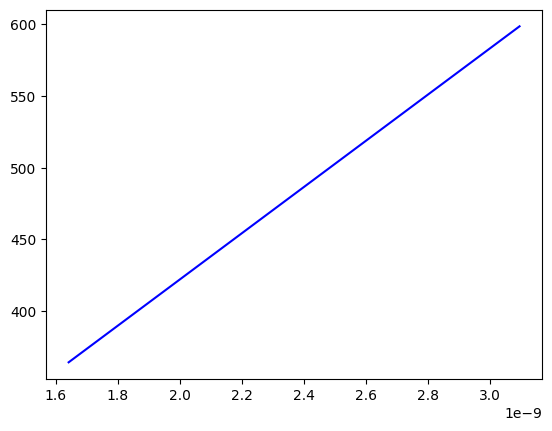

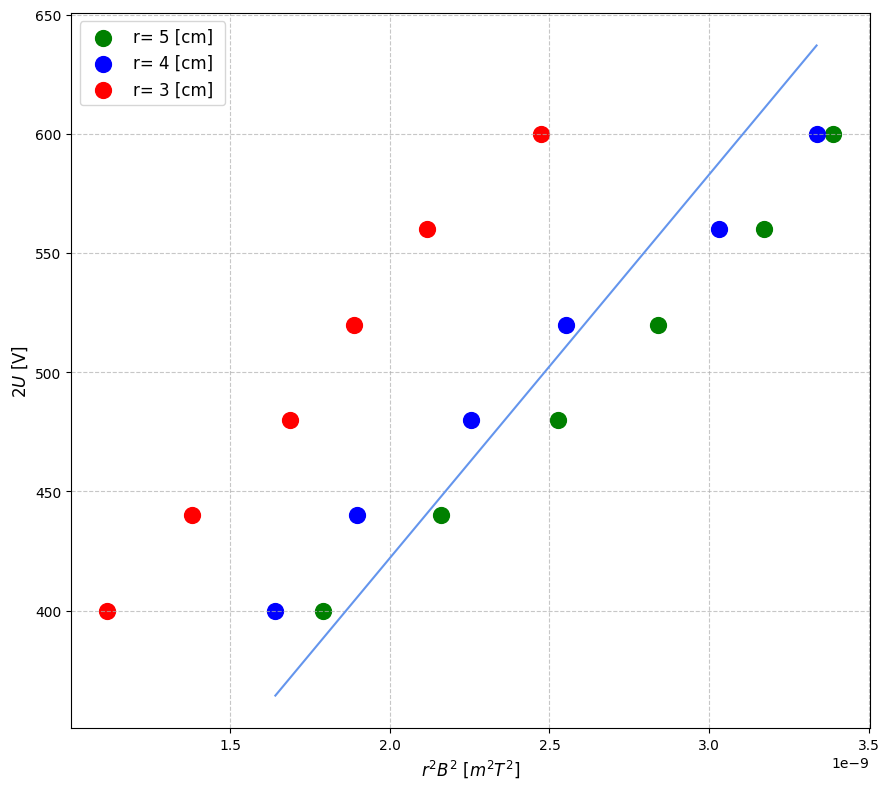

In [ ]:
b52=[]
for j in range(0,6):
    cuadrao5=B5[j]**(2) *0.05**2  
    b52.append(cuadrao5)

b42=[]
for j in range(0,6):
    cuadrao4=B4[j]**(2) * 0.04**2
    b42.append(cuadrao4)
b32=[]
for j in range(0,6):
    cuadrao3=B3[j]**(2) * 0.026**2
    b32.append(cuadrao3)
x_fit3 = np.linspace(min(b32), max(b32), 100)
y_fit3 = 1.58e11* x_fit3 +220
x_fit4 = np.linspace(min(b42), max(b42), 100)
y_fit4 = 1.61e11* x_fit4 +100
#x_fit5 = np.linspace(min(b52), max(b52), 100)
#y_fit5 = 1.61e11* x_fit3 +219
# Configuración del gráfico
plt.figure(figsize=(9, 8))
plt.grid(True, linestyle='--', alpha=0.7)
#plt.plot(x_fit3,y_fit3,color="lightcoral")
plt.plot(x_fit4,y_fit4,color="cornflowerblue")
plt.scatter(b52,u2,color="green",label="r= 5 [cm] ",s=130)
plt.scatter(b42,u2,color="blue",label="r= 4 [cm] ",s=130)
plt.scatter(b32,u2,color="red",label="r= 3 [cm] ",s=130)
plt.xlabel(r"$r^2B^2$ [$m^2T^2$]",fontsize=12);plt.ylabel(r"$2U$ [V]",fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

plt.show()



In [ ]:
# 2. e/m vs U
plt.figure(figsize=(6,4))
for r_cm, r_m in zip(radii_cm, radii_m):
    I_H = np.array(IH_data[r_cm], dtype=float)
    B = k * I_H
    mask = ~np.isnan(I_H)
    e_m_vals = (2*U[mask]) / ( (B[mask]**2) * (r_m**2) )
    plt.plot(U[mask], e_m_vals/1e11, 'o-', label=f"r={r_cm} cm")
plt.axhline(1.758, color='r', linestyle='--', label="Valor teórico")
plt.xlabel("Voltaje U [V]")
plt.ylabel("e/m [1e11 C/kg]")
plt.title("Determinación experimental de e/m del electrón")
plt.legend()
plt.grid()
plt.show()

KeyError: 3.18

<Figure size 600x400 with 0 Axes>

In [191]:
print(max(b32))
print(max(b42))
print(max(b52))

2.4730410729023997e-09
3.3360327705600003e-09
3.3886369440000014e-09


In [192]:
kaka=[2.4730410729023997e-09,3.3360327705600003e-09,3.3886369440000014e-09]
print(max(kaka))

3.3886369440000014e-09
